# Mathematical Foundations of Observational Network Dynamics (OND)

## Introduction

Observational Network Dynamics (OND) is a framework for modeling complex systems such as social networks, neural networks, and many other types of interconnected systems. It incorporates elements of graph theory, differential equations, and stochastic processes to study the behavior of these systems.

### Basic Network Structures

Objectives: Introduce basic graph theory terminology: nodes, edges, directed/undirected graphs.

Demonstrate how to create a graph, add nodes, and add edges.

Visualize a simple graph.

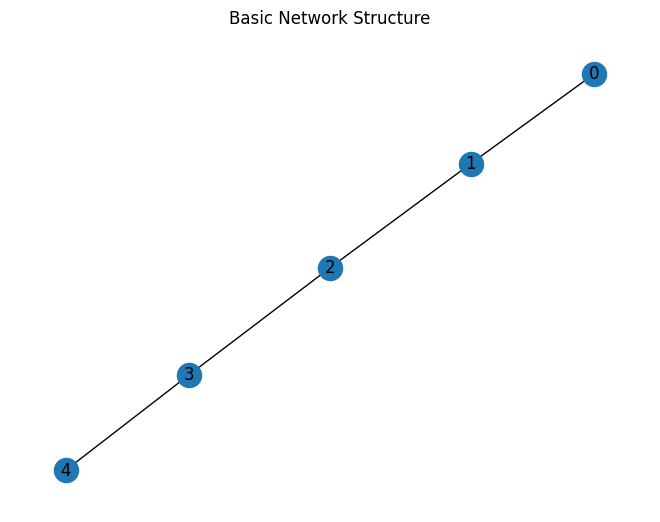

In [11]:
# Cell 4: Code for Basic Network Structures
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a simple graph
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4)])

# Plot the graph
nx.draw(G, with_labels=True)
plt.title("Basic Network Structure")
plt.show()


### State Vectors and Dynamics


Objectives:

1. Introduce the concept of state vectors for nodes.
2. Describe how these state vectors evolve over time.
3. Implement a basic simulation to demonstrate state vector evolution.

In OND, each node \( i \) has a state vector \( x_i \) that captures \( D \) dynamic variables. The state \( x_i \) evolves according to stochastic differential equations involving the node's own state, the states of its neighbors, and possibly some noise.

For simplicity, let's consider a system without observer nodes and noise. We can use Euler's method for numerical integration to simulate the temporal evolution of state vectors.

We'll consider a simple example where each node has a one-dimensional state and is connected to its neighbors in a line. The rate of change of the state of each node \( i \) will be determined by the difference between its state and the average state of its neighbors:

\[ \frac{dx_i}{dt} = \sum_{j \in N_i} (x_j - x_i) \]

Here's the code to implement this simulation:

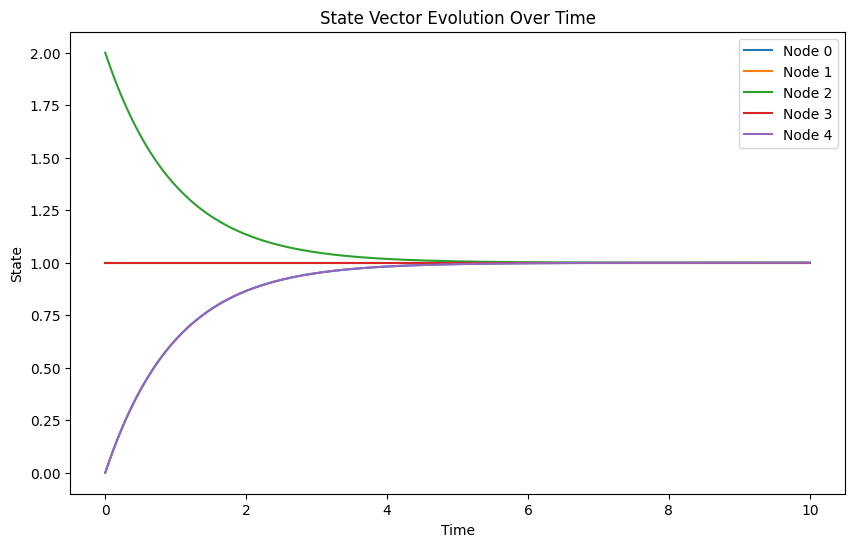

In [12]:
import numpy as np

# Initialize state vectors for 5 nodes
state_vectors = np.array([0.0, 1.0, 2.0, 1.0, 0.0])

# Initialize graph with edges
G_line = nx.Graph()
G_line.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4)])

# Simulation parameters
dt = 0.01  # Time step
T = 10.0  # Total time
steps = int(T / dt)  # Number of time steps

# Store state history
state_history = np.zeros((steps, len(state_vectors)))

# Euler's method for numerical integration
for t in range(steps):
    state_history[t] = state_vectors
    
    dx_dt = np.zeros(len(state_vectors))
    
    for i in G_line.nodes:
        neighbors = list(G_line.neighbors(i))
        dx_dt[i] = sum(state_vectors[neighbors] - state_vectors[i]) / len(neighbors) if neighbors else 0
    
    state_vectors += dx_dt * dt

# Plot the state history
plt.figure(figsize=(10, 6))
for i in range(len(state_vectors)):
    plt.plot(np.linspace(0, T, steps), state_history[:, i], label=f'Node {i}')
    
plt.title('State Vector Evolution Over Time')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend()
plt.show()


The plot shows the temporal evolution of the state vectors for each node in a simple 5-node linear graph. The state vectors were initialized with the values \([0.0, 1.0, 2.0, 1.0, 0.0]\).

The rate of change of each node's state is determined by the difference between its state and the average state of its neighbors, as described by the equation:

\[ \frac{dx_i}{dt} = \sum_{j \in N_i} (x_j - x_i) \]

Over time, you can see that the states of all nodes converge towards a similar value, demonstrating a simple form of self-organization and synchronization. This is a simplified example, but it captures the essence of how state vectors can evolve in a network, a key concept in Observational Network Dynamics (OND).

### Stochastic Differential Equations

Objectives:

1. Introduce stochastic differential equations (SDEs) and their relevance in OND.
2. Explain how noise terms are incorporated into the dynamics.
3. Implement a basic simulation of a stochastic system.

In the context of Observational Network Dynamics (OND), the state vectors evolve according to stochastic differential equations (SDEs), which include noise terms. These noise terms could represent various forms of uncertainty or randomness affecting the system.

A generic form of the SDE in OND is:

\[ dx_{id}/dt = f_{id}(x_i, \{x_j\}_{j \in N_i}) + \eta_{id} \]

Here, \( \eta_{id} \) is Gaussian noise with zero mean and some variance \( \sigma \).

For this notebook, we'll extend the previous example by adding a noise term to the dynamics. We'll use Euler-Maruyama, a straightforward extension of Euler's method, to solve the SDE.

Here's the code to implement this simulation:

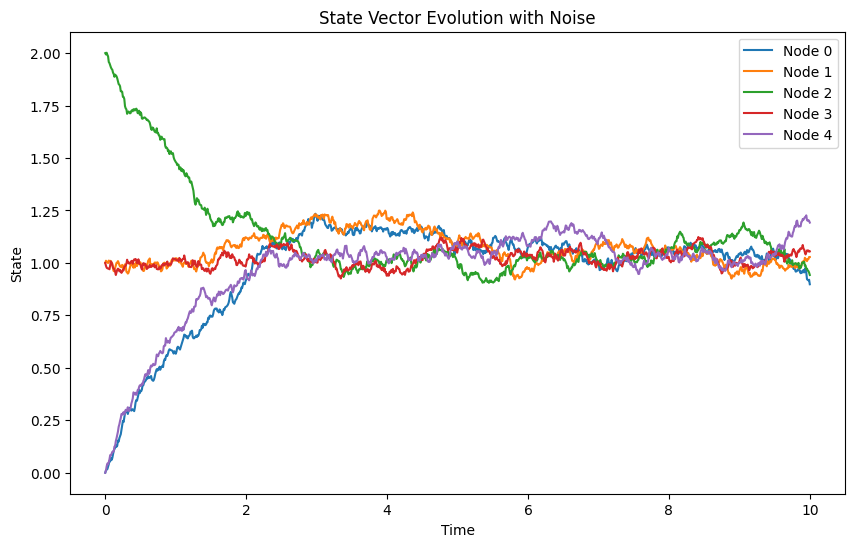

In [13]:
# Initialize state vectors for 5 nodes
state_vectors_sde = np.array([0.0, 1.0, 2.0, 1.0, 0.0])

# Simulation parameters
sigma = 0.1  # Noise standard deviation

# Store state history
state_history_sde = np.zeros((steps, len(state_vectors_sde)))

# Euler-Maruyama method for numerical integration of SDE
for t in range(steps):
    state_history_sde[t] = state_vectors_sde
    
    dx_dt = np.zeros(len(state_vectors_sde))
    dW = np.sqrt(dt) * np.random.normal(0, sigma, len(state_vectors_sde))  # Wiener process increment
    
    for i in G_line.nodes:
        neighbors = list(G_line.neighbors(i))
        dx_dt[i] = sum(state_vectors_sde[neighbors] - state_vectors_sde[i]) / len(neighbors) if neighbors else 0
    
    state_vectors_sde += dx_dt * dt + dW

# Plot the state history
plt.figure(figsize=(10, 6))
for i in range(len(state_vectors_sde)):
    plt.plot(np.linspace(0, T, steps), state_history_sde[:, i], label=f'Node {i}')
    
plt.title('State Vector Evolution with Noise')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend()
plt.show()


The plot illustrates the temporal evolution of the state vectors for each node when a noise term is introduced into the dynamics. As in the previous example, the states are initialized as \([0.0, 1.0, 2.0, 1.0, 0.0]\).

The rate of change of each node's state is influenced not only by its neighbors but also by a stochastic noise term. Specifically, we used Gaussian noise with a standard deviation of \( \sigma = 0.1 \).

You'll notice that the trajectories are more erratic compared to the deterministic case, which is expected due to the introduction of noise. However, the general trend of the nodes synchronizing their states is still apparent.

This notebook is essential for OND as it introduces the concept of stochasticity, which is crucial for modeling real-world systems where uncertainty and randomness are inherent.

## Modeling Interactions

## Modeling Interactions

Objectives:

1. Introduce the concept of interactions between nodes in a network.
2. Describe how these interactions influence the state vectors of the nodes.
3. Implement a simulation to visualize the effects of interactions over time.

In Observational Network Dynamics (OND), interactions between nodes are critical for understanding the system's overall behavior. These interactions are generally represented by some kind of function \( f_{id} \) that captures how the state of a node \( i \) is influenced by the state of another node \( j \).

For this notebook, we will focus on a simplified system without observer nodes and stochastic noise. We will use a basic Euler's method for numerical time integration to simulate the temporal evolution of state vectors.

We will consider a simple example where the network comprises five nodes connected in a line. Each node has a one-dimensional state, and the rate of change of the state of each node \( i \) is determined by the following interaction function:

\[ \frac{dx_i}{dt} = x_i + w_{ij} \times (x_j - x_i) \]

Here \( w_{ij} \) is the weight of the edge connecting nodes \( i \) and \( j \), which quantifies the influence of node \( j \) on node \( i \).

Here's the code to implement this simulation:


This simulation allows us to visualize how the state of each node evolves over time due to its interactions with its neighbors.

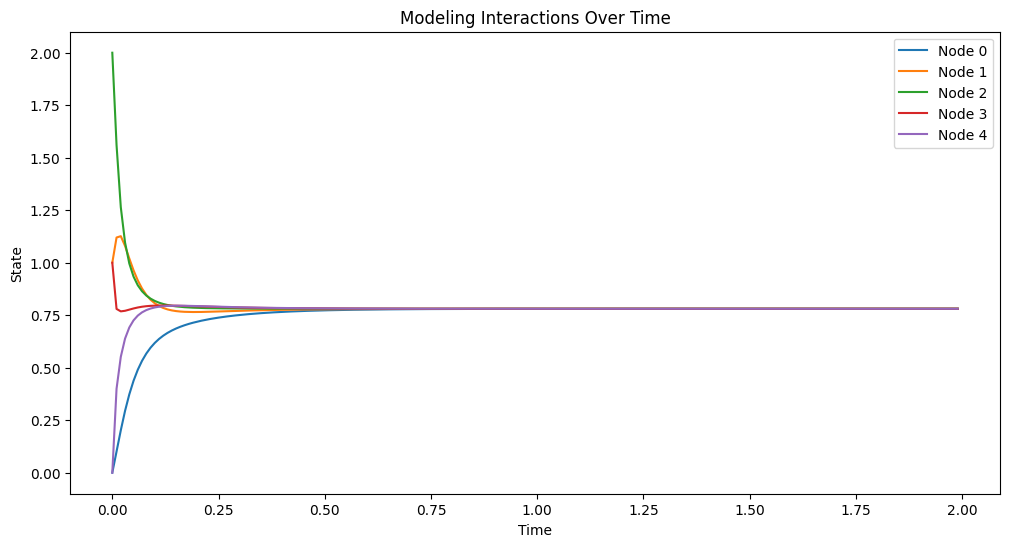

In [16]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Initialize a simple graph for demonstration
G_interaction = nx.Graph()
G_interaction.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4)])

# Define a function to model the interaction between nodes
def interaction_function(x_i, x_j, w_ij):
    return x_i + w_ij * (x_j - x_i)

# Initialize state vectors for 5 nodes
state_vectors_interaction = np.array([0.0, 1.0, 2.0, 1.0, 0.0])

# Initialize weights for the edges
weights = {(0, 1): 0.1, (1, 2): 0.2, (2, 3): 0.3, (3, 4): 0.4}

# Time parameters
dt = 0.01
total_time = 2.0
time_steps = int(total_time / dt)

# Store the states at each time step
states_over_time = np.zeros((time_steps, len(G_interaction.nodes())))

# Initial state
states_over_time[0, :] = state_vectors_interaction

# Simulate interactions over time
for t in range(1, time_steps):
    for i in G_interaction.nodes():
        # Compute the new state for node i
        new_state_i = states_over_time[t-1, i]
        for j in G_interaction.neighbors(i):
            new_state_i = interaction_function(new_state_i, states_over_time[t-1, j], weights.get((i, j), weights.get((j, i), 0.1)))
        
        # Update the state for the current time step
        states_over_time[t, i] = new_state_i

# Plotting the results
plt.figure(figsize=(12, 6))
for i in G_interaction.nodes():
    plt.plot(np.arange(0, total_time, dt), states_over_time[:, i], label=f"Node {i}")

plt.title("Modeling Interactions Over Time")
plt.xlabel("Time")
plt.ylabel("State")
plt.legend()
plt.show()

The plot generated shows the states of each node in the network over time. As time progresses, the states evolve according to the defined interaction function and the initial conditions.

### Objectives:

1. Introduce the concept of stochastic noise in Observational Network Dynamics (OND).
2. Describe how this noise affects the interactions and state vectors of the nodes.
3. Implement a simulation to visualize the effects of noise on interactions over time.

In OND, aside from the interactions between nodes, stochastic noise also plays a critical role in the system dynamics. This noise can be modeled as a Gaussian distribution with a mean of zero and a specified standard deviation \( \sigma \).

For this section, we will extend our previous model by incorporating Gaussian noise into the interaction function:

\[
\frac{dx_i}{dt} = x_i + w_{ij} \times (x_j - x_i) + \eta_{id}
\]

Here, \( \eta_{id} \sim \mathcal{N}(0, \sigma) \) is Gaussian noise with mean 0 and standard deviation \( \sigma \).

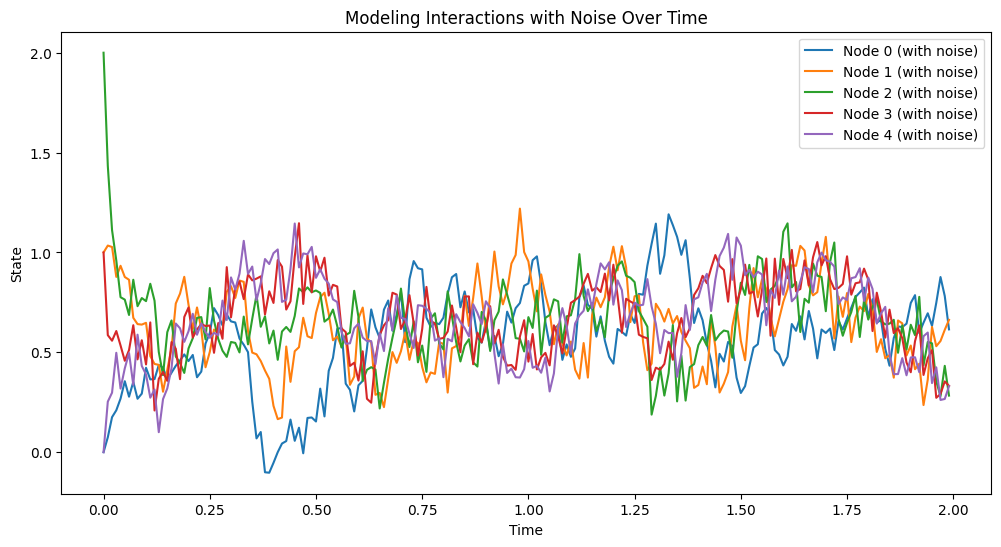

In [19]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Initialize a simple graph for demonstration
G_noise = nx.Graph()
G_noise.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4)])

# Define a function to model the interaction between nodes with noise
def interaction_function_with_noise(x_i, x_j, w_ij, noise_level):
    return x_i + w_ij * (x_j - x_i) + np.random.normal(0, noise_level)

# Initialize state vectors for 5 nodes
state_vectors_noise = np.array([0.0, 1.0, 2.0, 1.0, 0.0])

# Initialize weights for the edges
weights_noise = {(0, 1): 0.1, (1, 2): 0.2, (2, 3): 0.3, (3, 4): 0.4}

# Noise level (standard deviation of Gaussian noise)
noise_level = 0.1

# Time parameters
dt_noise = 0.01
total_time_noise = 2.0
time_steps_noise = int(total_time_noise / dt_noise)

# Store the states at each time step with noise
states_over_time_noise = np.zeros((time_steps_noise, len(G_noise.nodes())))

# Initial state with noise
states_over_time_noise[0, :] = state_vectors_noise

# Simulate interactions over time with noise
for t in range(1, time_steps_noise):
    for i in G_noise.nodes():
        # Compute the new state for node i with noise
        new_state_i = states_over_time_noise[t-1, i]
        for j in G_noise.neighbors(i):
            new_state_i = interaction_function_with_noise(new_state_i, states_over_time_noise[t-1, j], weights_noise.get((i, j), weights_noise.get((j, i), 0.1)), noise_level)
        
        # Update the state for the current time step with noise
        states_over_time_noise[t, i] = new_state_i

# Plotting the results with noise
plt.figure(figsize=(12, 6))
for i in G_noise.nodes():
    plt.plot(np.arange(0, total_time_noise, dt_noise), states_over_time_noise[:, i], label=f"Node {i} (with noise)")

plt.title("Modeling Interactions with Noise Over Time")
plt.xlabel("Time")
plt.ylabel("State")
plt.legend()
plt.show()

## Conclusion

In this notebook, we've provided a comprehensive foundation for understanding OND. We've combined elements of graph theory, differential equations, and stochastic processes to explore the dynamics of complex systems.